In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_by_cat = pd.read_csv("../data/processed/memory_footprint_by_category.csv")

In [3]:
def plot_scatter_size(max_x, category):
    df_max_filtr = df_by_cat[df_by_cat.disk_size < max_x]
    df_cat = df_max_filtr[df_max_filtr.category == category]
    fit_cat = np.polyfit(x=df_cat.disk_size, y=df_cat['size'], deg=1)
    plt.plot(df_cat.disk_size, df_cat['size'], 'o')
    _ = plt.plot(df_cat.disk_size, fit_cat[1] + fit_cat[0] * df_cat.disk_size)

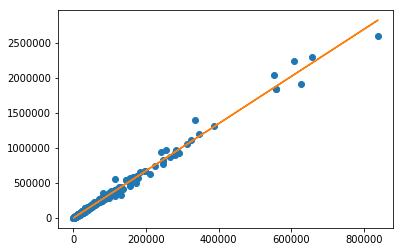

In [4]:
# plot fit for DataFrames only
plot_scatter_size(1000000, 'DataFrame')

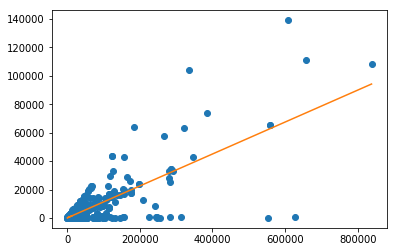

In [5]:
# plot fit for ISA objects only
plot_scatter_size(1000000, 'ISA')

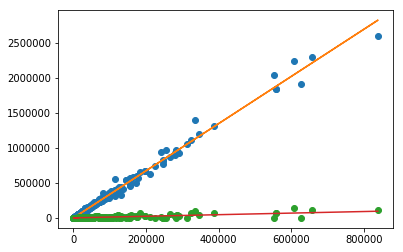

In [6]:
# plots both lines in one chart
max_x = 1000000
df_max_filtr = df_by_cat[df_by_cat.disk_size < max_x]
df_df = df_max_filtr[df_max_filtr.category == 'DataFrame']
fit_df = np.polyfit(x=df_df.disk_size, y=df_df['size'], deg=1)
plt.plot(df_df.disk_size, df_df['size'], 'o')
plt.plot(df_df.disk_size, fit_df[1] + fit_df[0] * df_df.disk_size)
df_isa = df_max_filtr[df_max_filtr.category == 'ISA']
fit_isa = np.polyfit(x=df_isa.disk_size, y=df_isa['size'], deg=1)
plt.plot(df_isa.disk_size, df_isa['size'], 'o')
_ = plt.plot(df_isa.disk_size, fit_isa[1] + fit_isa[0] * df_isa.disk_size)